<a href="https://colab.research.google.com/github/fastestmk/open_ds_course/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/open_ds_data/telecom_churn.csv')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape

(3333, 20)

# Whole dataset visualizations

In [ ]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype('int')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fdcde6160>,
      dtype=object)

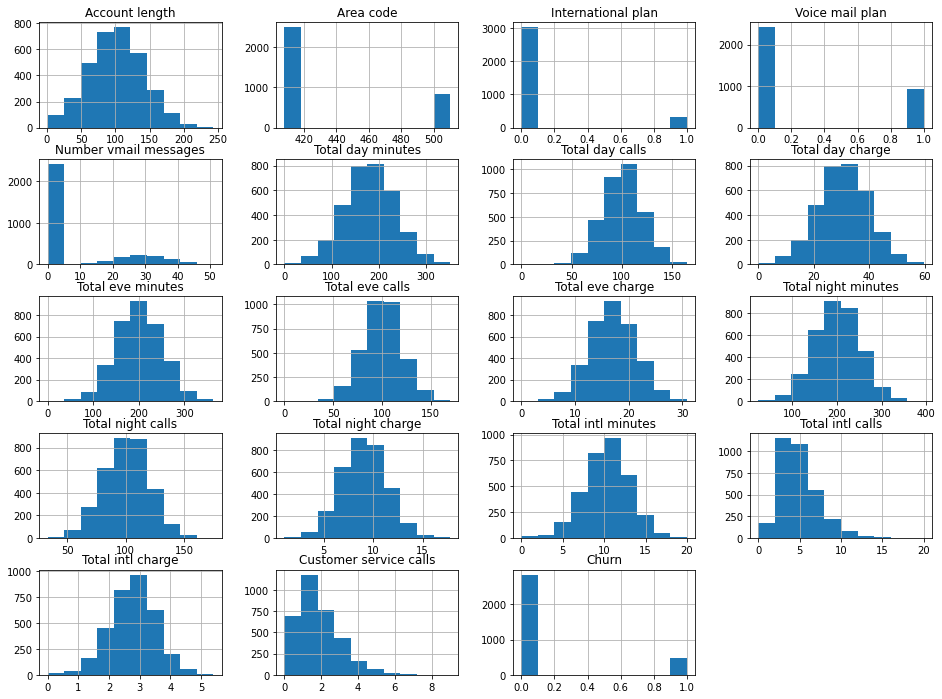

In [ ]:
plt.rcParams['figure.figsize'] = (16, 12)
df.drop(['State'], axis=1).hist()

In [ ]:
# correlation between features(columns)
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


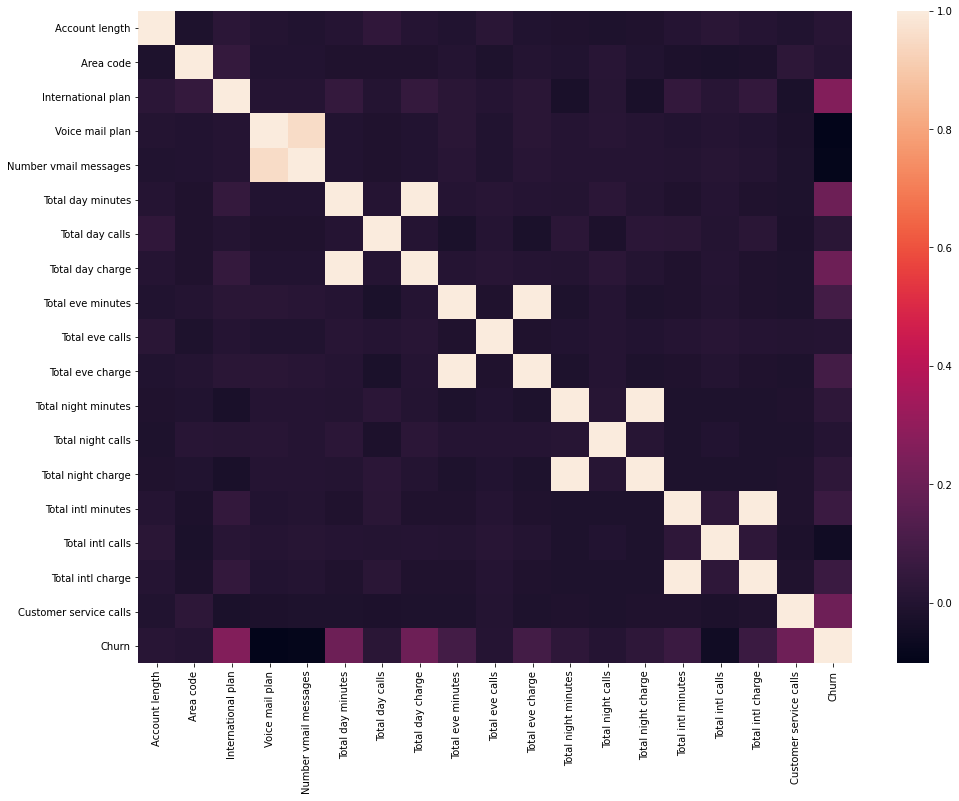

In [ ]:
# heatmap of correlation between features
sns.heatmap(df.corr())

In [ ]:
# dropping features contains 'charge' in its names and replacing old dataframe with new frame using 'inplace'
df.drop([feat_name for feat_name in df.columns if 'charge' in feat_name], axis=1, inplace=True)

In [ ]:
df.shape

(3333, 15)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
df.drop(['State'], axis=1, inplace=True)

In [ ]:
df.shape

(3333, 15)

In [ ]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [ ]:
tsne = TSNE(random_state=17)

In [ ]:
%%time
X_repr = tsne.fit_transform(df)

CPU times: user 1min 4s, sys: 230 ms, total: 1min 4s
Wall time: 33.4 s


In [ ]:
X_repr.shape

(3333, 2)

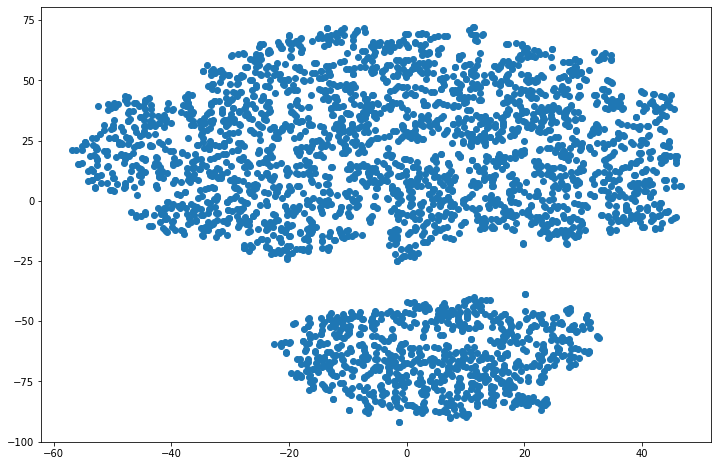

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.scatter(X_repr[:, 0], X_repr[:, 1])

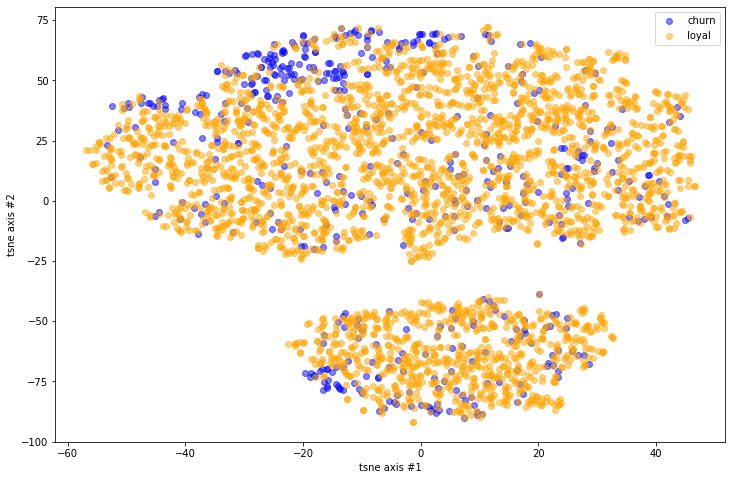

In [ ]:
# alpha is for transparency
plt.scatter(X_repr[df['Churn']==1, 0], X_repr[df['Churn']==1, 1], alpha=.5, c='blue', label='churn') # not-loyal customers
plt.scatter(X_repr[df['Churn']==0, 0], X_repr[df['Churn']==0, 1], alpha=.5, c='orange', label='loyal') # loyal customers
plt.xlabel('tsne axis #1')
plt.ylabel('tsne axis #2')
plt.legend() # like hue
plt.savefig('churn_tsne.png', dpi=300)

# Feature one at a time

# Numeric

In [ ]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

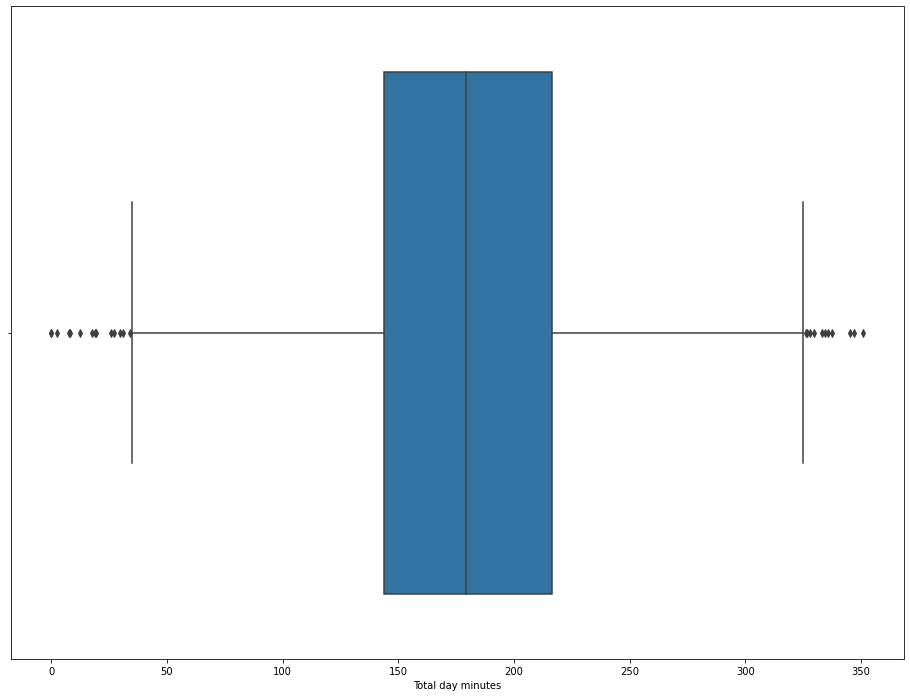

In [ ]:
sns.boxplot(x='Total day minutes', data=df)

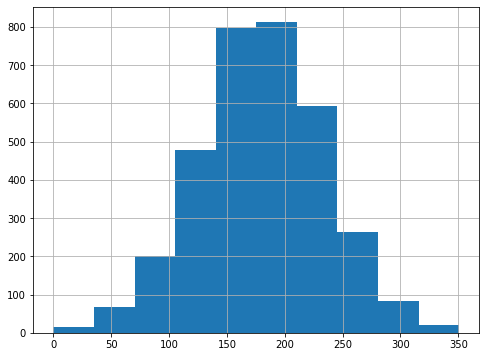

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
df['Total day minutes'].hist()

#Categorical

In [ ]:
df['State'].nunique()

51

In [ ]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize=True) # normalize to get percentage

0    0.855086
1    0.144914
Name: Churn, dtype: float64

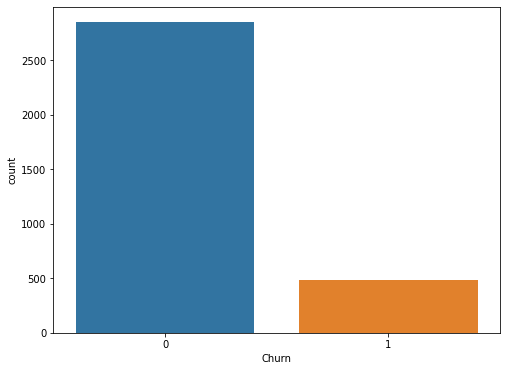

In [ ]:
sns.countplot(x='Churn', data=df)

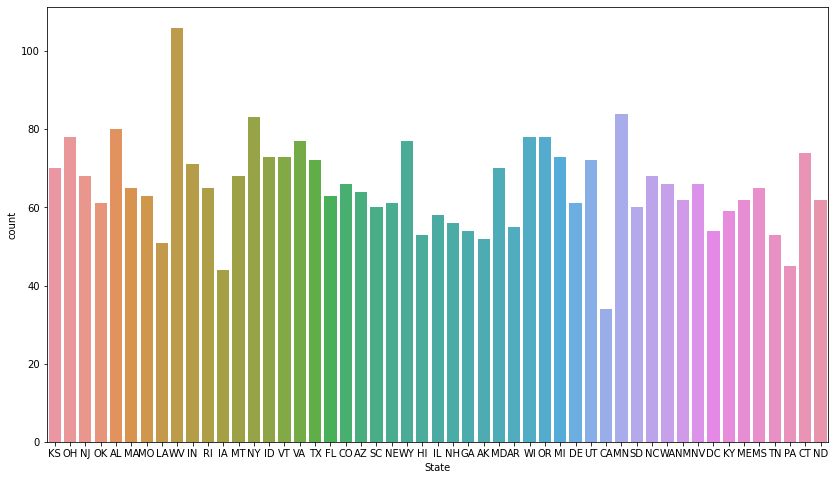

In [ ]:
plt.rcParams['figure.figsize'] = (14,8)
sns.countplot(x='State', data=df)

# Interactions between features

# Numeric-numeric

In [ ]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

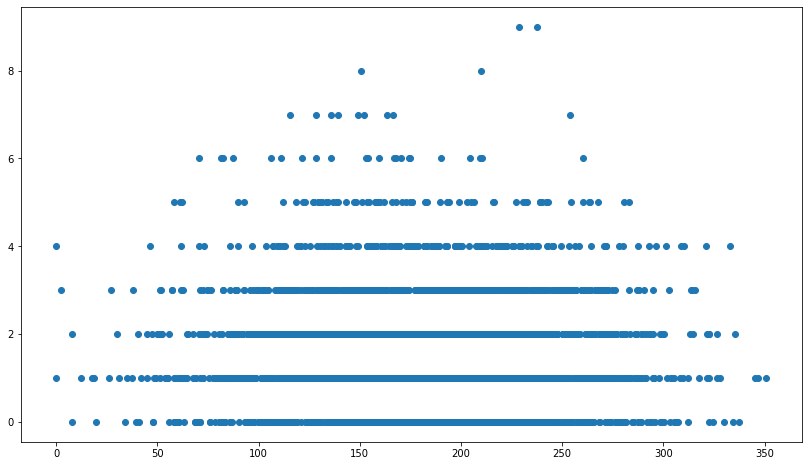

In [ ]:
plt.scatter(df['Total day minutes'], df['Customer service calls'])

# Categorical-categorical

In [ ]:
df.drop(['State'], axis=1, inplace=True)

In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


Text(0.5, 1.0, 'Customer service calls for loyal and churned')

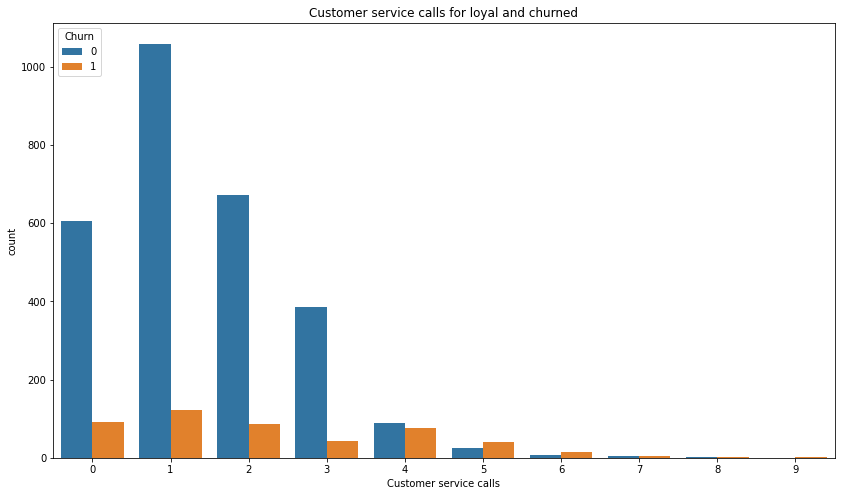

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)
plt.title('Customer service calls for loyal and churned')

# Categorical-Numerical

In [ ]:
import numpy as np

In [ ]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total day minutes,Customer service calls
Churn,,
0,175.175754,1.449825
1,206.914079,2.229814


In [ ]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.median, np.std])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total day minutes            Customer service calls          
                 median        std                 median       std
Churn                                                              
0                 177.2  50.181655                      1  1.163883
1                 217.6  68.997792                      2  1.853275

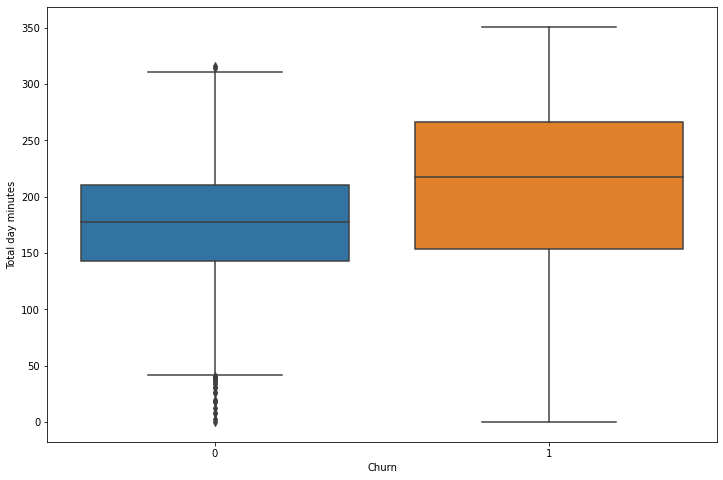

In [ ]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)
# it shows churn customer speaks more than loyal customer